In [3]:
%%html
<marquee style='width: 30%; color: red;'><b>****====****</b></marquee>

# **Google Drive Connect & Navigate Directory**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Pattern_Project

/content/drive/My Drive/Pattern_Project


# **Import Libraries**

In [4]:
import os, re, sys, pprint, string, math, time, copy
from os.path import isfile, join
from os import listdir
import warnings, random, helper, shutil, cv2
random.seed(5)
warnings.filterwarnings('ignore')
from datetime import datetime
import IPython.display as ipd
from IPython.display import IFrame, display, HTML
import pickle

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Plotting library
import matplotlib.pyplot as plt
# tells matplotlib to embed plots within the notebook
%matplotlib inline
plt.set_cmap('viridis')
plt.style.use('fivethirtyeight')
import matplotlib.cm as cm

# Scientific and vector computation for python
import numpy as np
np.random.seed(5)


# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()

from PIL import ImageFile, Image
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import KFold, cross_val_score, train_test_split, RepeatedStratifiedKFold, RepeatedKFold, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor,LinearRegression,ElasticNet,BayesianRidge
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import  StackingCVRegressor



# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()
# from fastai.vision.all import *
# from fastbook import *
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from torchsummary import summary
from torch.utils.data import Subset, DataLoader, ConcatDataset, Dataset




import librosa # for music and audio analysis
import librosa.display # for audio visualization
import soundfile as sf # librosa fails when reading files on Kaggle.

<Figure size 432x288 with 0 Axes>

# Download/Import Dataset

In [ ]:
# Dataset Link https://drive.google.com/file/d/xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx/view
# Download
# !gdown --id xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# Unzip 
# !unzip "/content/drive/My Drive/xx.zip" -d "/content/drive/My Drive/"

# **Audio Data Overview**

In [ ]:
dir_path = '/content/drive/My Drive/Pattern_Project/chords_dataset/'
ipd.Audio(dir_path + 'minor/1_4.wav')

In [ ]:
ipd.Audio(dir_path + 'major/1_4.wav')

In [ ]:
audio_path = dir_path + 'major/1_4.wav'
audio_path2 = dir_path + 'minor/1_4.wav'

### Visualize a waveform in the time domain.

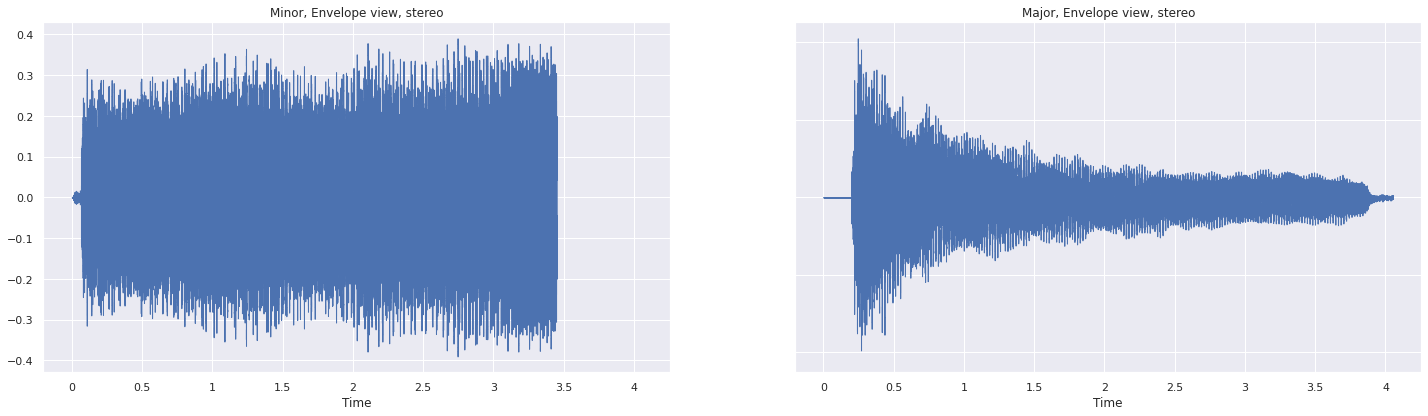

In [ ]:
y, sr = librosa.load(audio_path2,mono=False)
fig, ax = plt.subplots(ncols=2, sharex=True, figsize=(22, 6))
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Minor, Envelope view, stereo')
ax[0].label_outer()
y, sr = librosa.load(audio_path, mono=False)
librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Major, Envelope view, stereo')
ax[1].label_outer()


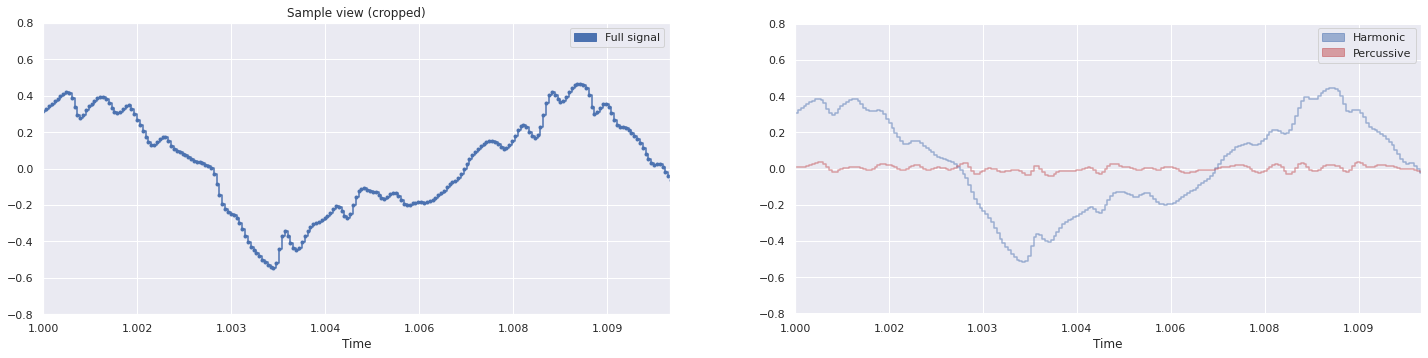

In [ ]:
y, sr = librosa.load(audio_path,)
y_harm, y_perc = librosa.effects.hpss(y)
fig, (ax, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(22, 5))
ax.set(xlim=[1.0, 1.01], title='Sample view (cropped)', ylim=[-0.8, 0.8])
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
ax.label_outer()
ax.legend()
ax2.legend()

### Visualize spectro-temporal data.

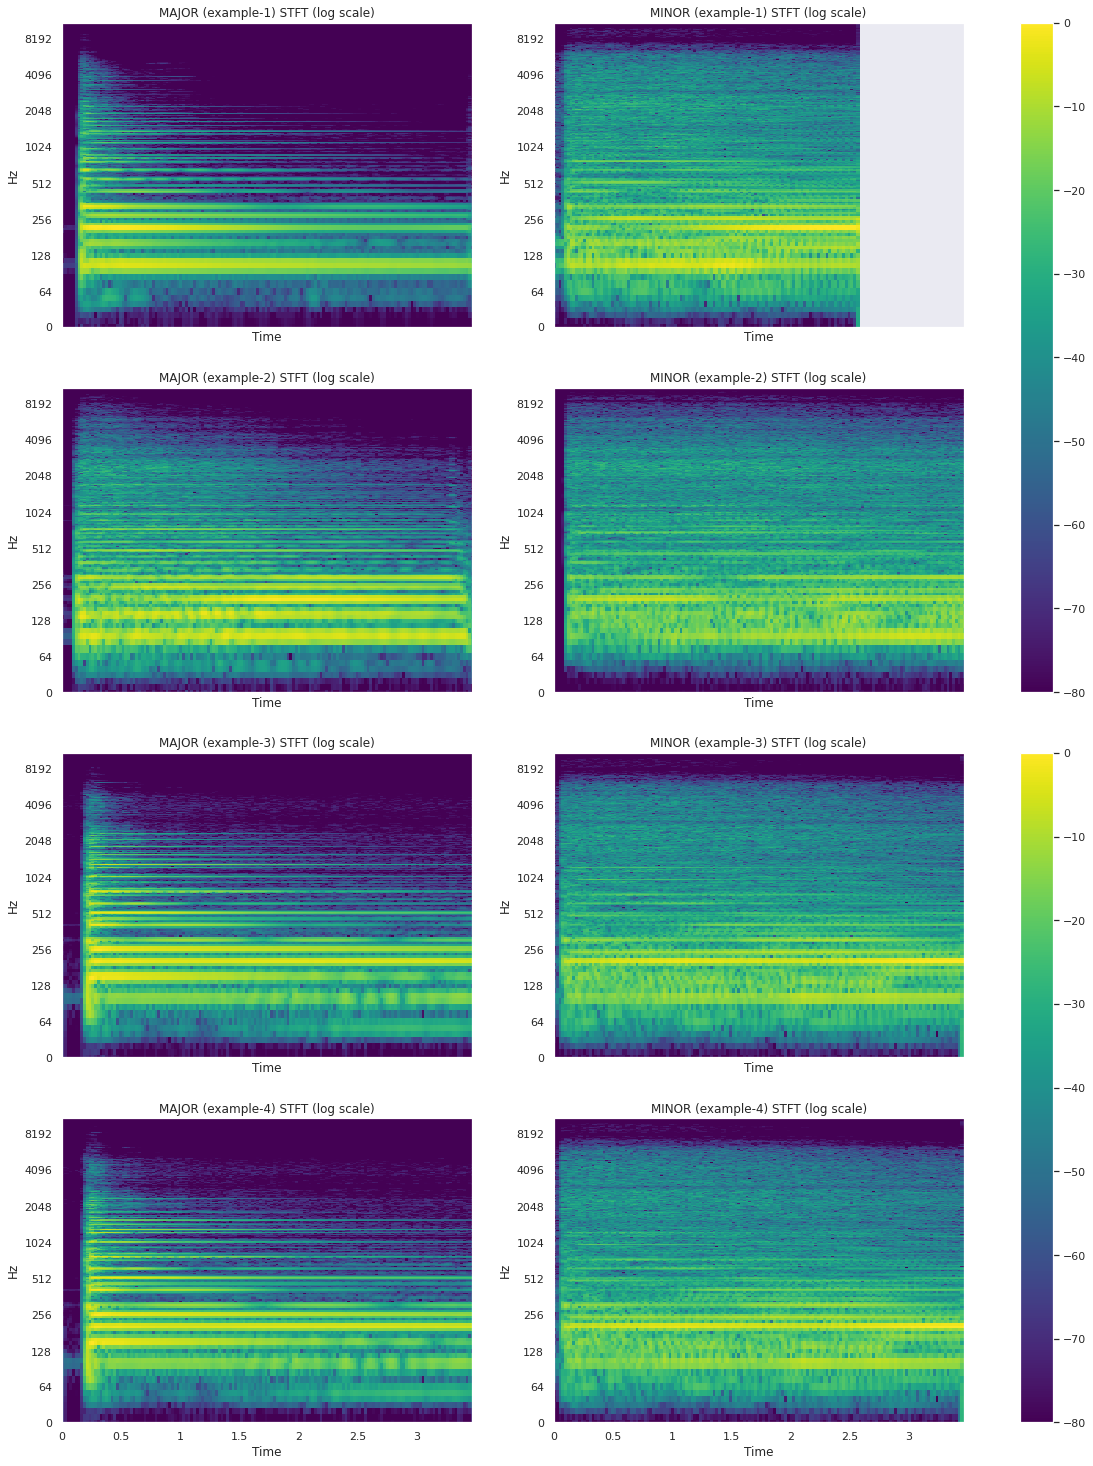

In [ ]:
y, sr = librosa.load(dir_path + 'major/1_5.wav')
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(18, 24))
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[0,0], cmap='viridis')
ax[0,0].set(title='MAJOR (example-1) STFT (log scale)')
y, sr = librosa.load(dir_path + 'minor/1_5.wav')
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[0,1], cmap='viridis')
ax[0,1].set(title='MINOR (example-1) STFT (log scale)')
y, sr = librosa.load(dir_path + 'major/1_3.wav')
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[1,0], cmap='viridis')
ax[1,0].set(title='MAJOR (example-2) STFT (log scale)')
y, sr = librosa.load(dir_path + 'minor/1_3.wav')
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[1,1], cmap='viridis')
ax[1,1].set(title='MINOR (example-2) STFT (log scale)')
y, sr = librosa.load(dir_path + 'major/1_4.wav')
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[2,0], cmap='viridis')
ax[2,0].set(title='MAJOR (example-3) STFT (log scale)')
y, sr = librosa.load(dir_path + 'minor/1_4.wav')
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[2,1], cmap='viridis')
ax[2,1].set(title='MINOR (example-3) STFT (log scale)')
y, sr = librosa.load(dir_path + 'major/1_4.wav')
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[3,0], cmap='viridis')
ax[3,0].set(title='MAJOR (example-4) STFT (log scale)')
y, sr = librosa.load(dir_path + 'minor/1_4.wav')
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[3,1], cmap='viridis')
ax[3,1].set(title='MINOR (example-4) STFT (log scale)')
fig.colorbar(img1, ax=[ax[0,0], ax[0,1], ax[1,0], ax[1,1]])
fig.colorbar(img1, ax=[ax[2,0], ax[2,1], ax[3,0], ax[3,1]])
fig.savefig('STFT comparison.png')

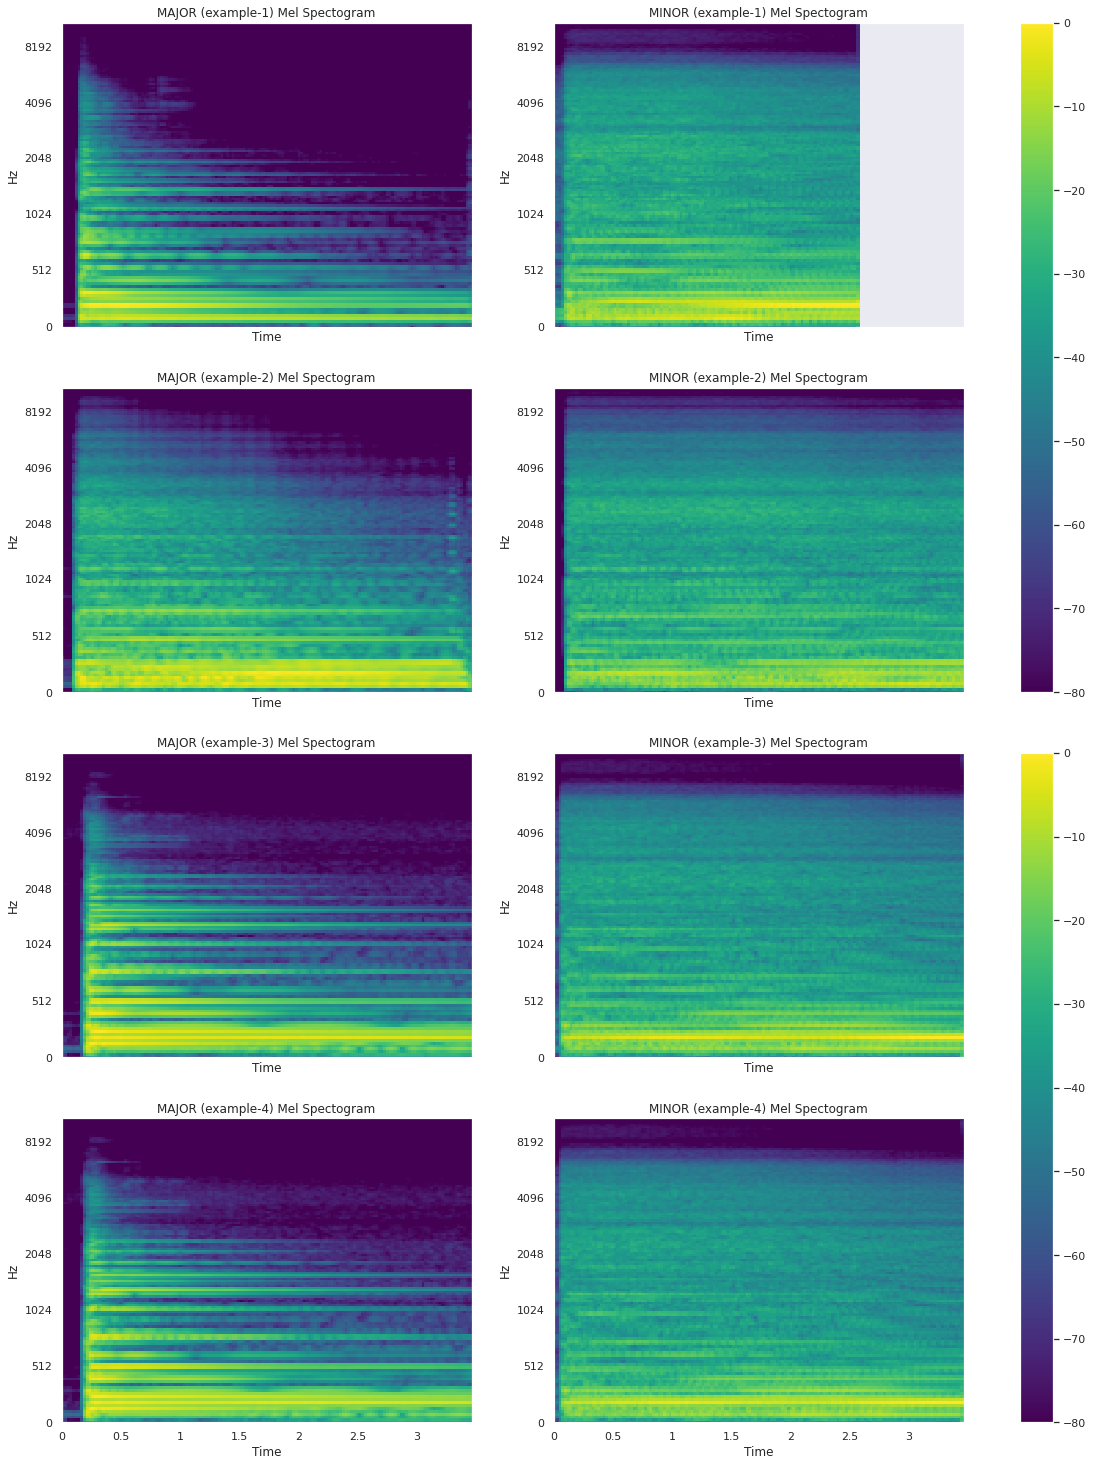

In [ ]:
y, sr = librosa.load(dir_path + 'major/1_5.wav')
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(18, 24))
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[0,0], cmap='viridis')
ax[0,0].set(title='MAJOR (example-1) Mel Spectogram')
y, sr = librosa.load(dir_path + 'minor/1_5.wav')
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[0,1], cmap='viridis')
ax[0,1].set(title='MINOR (example-1) Mel Spectogram')
y, sr = librosa.load(dir_path + 'major/1_3.wav')
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[1,0], cmap='viridis')
ax[1,0].set(title='MAJOR (example-2) Mel Spectogram')
y, sr = librosa.load(dir_path + 'minor/1_3.wav')
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[1,1], cmap='viridis')
ax[1,1].set(title='MINOR (example-2) Mel Spectogram')
y, sr = librosa.load(dir_path + 'major/1_4.wav')
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[2,0], cmap='viridis')
ax[2,0].set(title='MAJOR (example-3) Mel Spectogram')
y, sr = librosa.load(dir_path + 'minor/1_4.wav')
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[2,1], cmap='viridis')
ax[2,1].set(title='MINOR (example-3) Mel Spectogram')
y, sr = librosa.load(dir_path + 'major/1_4.wav')
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[3,0], cmap='viridis')
ax[3,0].set(title='MAJOR (example-4) Mel Spectogram')
y, sr = librosa.load(dir_path + 'minor/1_4.wav')
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[3,1], cmap='viridis')
ax[3,1].set(title='MINOR (example-4) Mel Spectogram')
fig.colorbar(img1, ax=[ax[0,0], ax[0,1], ax[1,0], ax[1,1]])
fig.colorbar(img1, ax=[ax[2,0], ax[2,1], ax[3,0], ax[3,1]])
fig.savefig('Mel spec comparison.png')


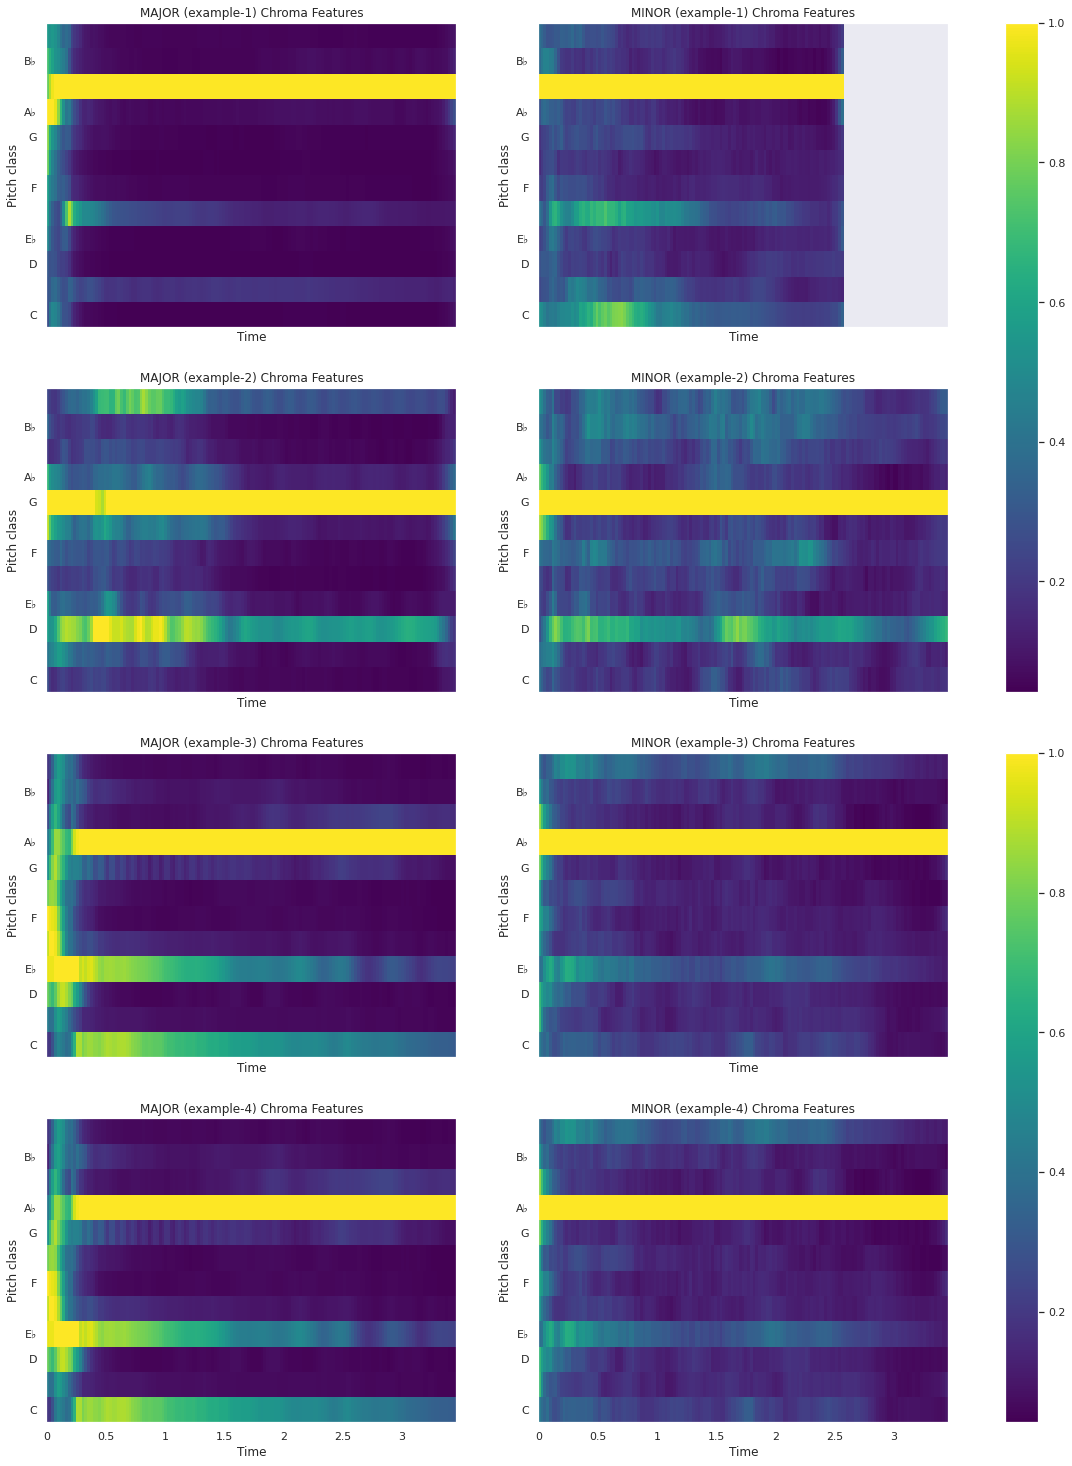

In [ ]:
y, sr = librosa.load(dir_path + 'major/1_5.wav')
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(18, 24))
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[0,0], cmap='viridis')
ax[0,0].set(title='MAJOR (example-1) Chroma Features')
y, sr = librosa.load(dir_path + 'minor/1_5.wav')
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[0,1], cmap='viridis')
ax[0,1].set(title='MINOR (example-1) Chroma Features')
y, sr = librosa.load(dir_path + 'major/1_3.wav')
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[1,0], cmap='viridis')
ax[1,0].set(title='MAJOR (example-2) Chroma Features')
y, sr = librosa.load(dir_path + 'minor/1_3.wav')
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[1,1], cmap='viridis')
ax[1,1].set(title='MINOR (example-2) Chroma Features')
y, sr = librosa.load(dir_path + 'major/1_4.wav')
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[2,0], cmap='viridis')
ax[2,0].set(title='MAJOR (example-3) Chroma Features')
y, sr = librosa.load(dir_path + 'minor/1_4.wav')
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[2,1], cmap='viridis')
ax[2,1].set(title='MINOR (example-3) Chroma Features')
y, sr = librosa.load(dir_path + 'major/1_4.wav')
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[3,0], cmap='viridis')
ax[3,0].set(title='MAJOR (example-4) Chroma Features')
y, sr = librosa.load(dir_path + 'minor/1_4.wav')
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img1 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[3,1], cmap='viridis')
ax[3,1].set(title='MINOR (example-4) Chroma Features')
fig.colorbar(img1, ax=[ax[0,0], ax[0,1], ax[1,0], ax[1,1]])
fig.colorbar(img1, ax=[ax[2,0], ax[2,1], ax[3,0], ax[3,1]])
fig.savefig('Chroma features comparison.png')


# **Feature Extraction**

In [ ]:
#######################################################################
#ACKNOWLEDGEMENT: shorturl.at/goCL4
#######################################################################



def extract_feature(path, savepath):
    id = 0  # Song ID

    songname_vector = []
    tempo_vector = []
    total_beats = []
    average_beats = []
    chroma_stft_mean = []
    chroma_stft_std = []
    chroma_stft_var = []
    chroma_cq_mean = []
    chroma_cq_std = []
    chroma_cq_var = []
    chroma_cens_mean = []
    chroma_cens_std = []
    chroma_cens_var = []
    mel_mean = []
    mel_std = []
    mel_var = []
    mfcc_mean = []
    mfcc_std = []
    mfcc_var = []
    mfcc_delta_mean = []
    mfcc_delta_std = []
    mfcc_delta_var = []
    rmse_mean = []
    rmse_std = []
    rmse_var = []
    cent_mean = []
    cent_std = []
    cent_var = []
    spec_bw_mean = []
    spec_bw_std = []
    spec_bw_var = []
    contrast_mean = []
    contrast_std = []
    contrast_var = []
    rolloff_mean = []
    rolloff_std = []
    rolloff_var = []
    poly_mean = []
    poly_std = []
    poly_var = []
    tonnetz_mean = []
    tonnetz_std = []
    tonnetz_var = []
    zcr_mean = []
    zcr_std = []
    zcr_var = []
    harm_mean = []
    harm_std = []
    harm_var = []
    perc_mean = []
    perc_std = []
    perc_var = []
    frame_mean = []
    frame_std = []
    frame_var = []

    mfccs_mean_0 = []
    mfccs_mean_1 = []
    mfccs_mean_2 = []
    mfccs_mean_3 = []
    mfccs_mean_4 = []
    mfccs_mean_5 = []
    mfccs_mean_6 = []
    mfccs_mean_7 = []
    mfccs_mean_8 = []
    mfccs_mean_9 = []
    mfccs_mean_10 = []
    mfccs_mean_11 = []
    mfccs_mean_12 = []

    mfccs_std_0 = []
    mfccs_std_1 = []
    mfccs_std_2 = []
    mfccs_std_3 = []
    mfccs_std_4 = []
    mfccs_std_5 = []
    mfccs_std_6 = []
    mfccs_std_7 = []
    mfccs_std_8 = []
    mfccs_std_9 = []
    mfccs_std_10 = []
    mfccs_std_11 = []
    mfccs_std_12 = []

    chroma_mean_0 = []
    chroma_mean_1 = []
    chroma_mean_2 = []
    chroma_mean_3 = []
    chroma_mean_4 = []
    chroma_mean_5 = []
    chroma_mean_6 = []
    chroma_mean_7 = []
    chroma_mean_8 = []
    chroma_mean_9 = []
    chroma_mean_10 = []
    chroma_mean_11 = []
    
    chroma_std_0 = []
    chroma_std_1 = []
    chroma_std_2 = []
    chroma_std_3 = []
    chroma_std_4 = []
    chroma_std_5 = []
    chroma_std_6 = []
    chroma_std_7 = []
    chroma_std_8 = []
    chroma_std_9 = []
    chroma_std_10 = []
    chroma_std_11 = []


    contrast_mean_0 = []
    contrast_mean_1 = []
    contrast_mean_2 = []
    contrast_mean_3 = []
    contrast_mean_4 = []
    contrast_mean_5 = []
    contrast_mean_6 = []

    contrast_std_0 = []
    contrast_std_1 = []
    contrast_std_2 = []
    contrast_std_3 = []
    contrast_std_4 = []
    contrast_std_5 = []
    contrast_std_6 = []
    
    
    # Traversing over each file in path
    file_data = [f for f in listdir(path) if isfile (join(path, f))]
    for line in file_data:
        if ( line[-1:] == '\n' ):
            line = line[:-1]

        # Reading Song
        songname = path + line
        y, sr = librosa.load(songname, )
        y1, sr1 = sf.read(songname, always_2d=True)
        y1 = y1.flatten('F')[:y1.shape[0]] 
        #S = np.abs(librosa.stft(y))
        # Extracting Features
        tempo, beats = librosa.beat.beat_track(y=y)
        #chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        #chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)
        chroma_cens = librosa.feature.chroma_cens(y=y)
        melspectrogram = librosa.feature.melspectrogram(y=y)
        #rmse = librosa.feature.rms(y=y)
        cent = librosa.feature.spectral_centroid(y=y)
        spec_bw = librosa.feature.spectral_bandwidth(y=y)
        #contrast = librosa.feature.spectral_contrast(y=y, S=S, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y)
        #poly_features = librosa.feature.poly_features(S=S, sr=sr)
        #tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        harmonic = librosa.effects.harmonic(y)
        percussive = librosa.effects.percussive(y)
        mfcc = librosa.feature.mfcc(y=y1, n_mfcc=13)
        mfcc_delta = librosa.feature.delta(mfcc)
        #onset_frames = librosa.onset.onset_detect(y=y,sr=sr)
        #frames_to_time = librosa.frames_to_time(onset_frames[:20], sr=sr)
        # Transforming Features
        # songname_vector.at[id, line]=line  # song name
        # tempo_vector.at[id, tempo]=tempo  # tempo
        songname_vector.append(line)
        tempo_vector.append(tempo)
        total_beats.append(sum(beats))  # beats
        average_beats.append(np.average(beats))
        #chroma_stft_mean.append(np.mean(chroma_stft))  # chroma stft
        #chroma_stft_std.append(np.std(chroma_stft))
        #chroma_stft_var.append(np.var(chroma_stft))
        #chroma_cq_mean.append(np.mean(chroma_cq))  # chroma cq
        #chroma_cq_std.append(np.std(chroma_cq))
        #chroma_cq_var.append(np.var(chroma_cq))
        chroma_cens_mean.append(np.mean(chroma_cens))  # chroma cens
        chroma_cens_std.append(np.std(chroma_cens))
        chroma_cens_var.append(np.var(chroma_cens))
        mel_mean.append(np.mean(melspectrogram))  # melspectrogram
        mel_std.append(np.std(melspectrogram))
        mel_var.append(np.var(melspectrogram))


        mfcc_mean.append(np.mean(mfcc))  # mfcc
        #print('MFCC MEAN')
        #print(len(mfcc_mean))
        #print(mfcc_mean)
        mfcc_std.append(np.std(mfcc))


        mfcc_var.append(np.var(mfcc))
        mfcc_delta_mean.append(np.mean(mfcc_delta))  # mfcc delta
        mfcc_delta_std.append(np.std(mfcc_delta))
        mfcc_delta_var.append(np.var(mfcc_delta))
        #rmse_mean.append(np.mean(rmse))  # rmse
        #rmse_std.append(np.std(rmse))
        #rmse_var.append(np.var(rmse))
        cent_mean.append(np.mean(cent))  # cent
        cent_std.append(np.std(cent))
        cent_var.append(np.var(cent))
        spec_bw_mean.append(np.mean(spec_bw))  # spectral bandwidth
        spec_bw_std.append(np.std(spec_bw))
        spec_bw_var.append(np.var(spec_bw))
        # contrast_mean.append(np.mean(contrast))  # contrast
        # contrast_std.append(np.std(contrast))
        # contrast_var.append(np.var(contrast))

        rolloff_mean.append(np.mean(rolloff))  # rolloff
        rolloff_std.append(np.std(rolloff))
        rolloff_var.append(np.var(rolloff))
        #poly_mean.append(np.mean(poly_features))  # poly features
        #poly_std.append(np.std(poly_features))
        #poly_var.append(np.var(poly_features))
        #tonnetz_mean.append(np.mean(tonnetz))  # tonnetz
        #tonnetz_std.append(np.std(tonnetz))
        #tonnetz_var.append(np.var(tonnetz))
        zcr_mean.append(np.mean(zcr))  # zero crossing rate
        zcr_std.append(np.std(zcr))
        zcr_var.append(np.var(zcr))
        harm_mean.append(np.mean(harmonic))  # harmonic
        harm_std.append(np.std(harmonic))
        harm_var.append(np.var(harmonic))
        perc_mean.append(np.mean(percussive))  # percussive
        perc_std.append(np.std(percussive))
        perc_var.append(np.var(percussive))
        #frame_mean.append(np.mean(frames_to_time))  # frames
        #frame_std.append(np.std(frames_to_time))
        #frame_var.append(np.var(frames_to_time))
        mfccs_mean2=np.mean(mfcc,axis=1)
        mfccs_std2=np.std(mfcc,axis=1)
        chroma_mean2 = np.mean(chroma_cens, axis=1)
        chroma_std2 = np.std(chroma_cens, axis=1)
        ####################
        # contrast_mean2=np.mean(contrast,axis=1)
        # contrast_std2=np.std(contrast,axis=1)
        mfccs_mean_0.append(mfccs_mean2[0])
        mfccs_mean_1.append(mfccs_mean2[1])
        mfccs_mean_2.append(mfccs_mean2[2])
        mfccs_mean_3.append(mfccs_mean2[3])
        mfccs_mean_4.append(mfccs_mean2[4])
        mfccs_mean_5.append(mfccs_mean2[5])
        mfccs_mean_6.append(mfccs_mean2[6])
        mfccs_mean_7.append(mfccs_mean2[7])
        mfccs_mean_8.append(mfccs_mean2[8])
        mfccs_mean_9.append(mfccs_mean2[9])
        mfccs_mean_10.append(mfccs_mean2[10])
        mfccs_mean_11.append(mfccs_mean2[11])
        mfccs_mean_12.append(mfccs_mean2[12])

        mfccs_std_0.append(mfccs_std2[0])
        mfccs_std_1.append(mfccs_std2[1])
        mfccs_std_2.append(mfccs_std2[2])
        mfccs_std_3.append(mfccs_std2[3])
        mfccs_std_4.append(mfccs_std2[4])
        mfccs_std_5.append(mfccs_std2[5])
        mfccs_std_6.append(mfccs_std2[6])
        mfccs_std_7.append(mfccs_std2[7])
        mfccs_std_8.append(mfccs_std2[8])
        mfccs_std_9.append(mfccs_std2[9])
        mfccs_std_10.append(mfccs_std2[10])
        mfccs_std_11.append(mfccs_std2[11])
        mfccs_std_12.append(mfccs_std2[12])

        
        chroma_mean_0.append(chroma_mean2[0])
        chroma_mean_1.append(chroma_mean2[1])
        chroma_mean_2.append(chroma_mean2[2])
        chroma_mean_3.append(chroma_mean2[3])
        chroma_mean_4.append(chroma_mean2[4])
        chroma_mean_5.append(chroma_mean2[5])
        chroma_mean_6.append(chroma_mean2[6])
        chroma_mean_7.append(chroma_mean2[7])
        chroma_mean_8.append(chroma_mean2[8])
        chroma_mean_9.append(chroma_mean2[9])
        chroma_mean_10.append(chroma_mean2[10])
        chroma_mean_11.append(chroma_mean2[11])

        chroma_std_0.append(chroma_std2[0])
        chroma_std_1.append(chroma_std2[1])
        chroma_std_2.append(chroma_std2[2])
        chroma_std_3.append(chroma_std2[3])
        chroma_std_4.append(chroma_std2[4])
        chroma_std_5.append(chroma_std2[5])
        chroma_std_6.append(chroma_std2[6])
        chroma_std_7.append(chroma_std2[7])
        chroma_std_8.append(chroma_std2[8])
        chroma_std_9.append(chroma_std2[9])
        chroma_std_10.append(chroma_std2[10])
        chroma_std_11.append(chroma_std2[11])
        # contrast_mean_0.append(contrast_mean2[0])
        # contrast_mean_1.append(contrast_mean2[1])
        # contrast_mean_2.append(contrast_mean2[2])
        # contrast_mean_3.append(contrast_mean2[3])
        # contrast_mean_4.append(contrast_mean2[4])
        # contrast_mean_5.append(contrast_mean2[5])
        # contrast_mean_6.append(contrast_mean2[6])
        # contrast_std_0.append(contrast_std2[0])
        # contrast_std_1.append(contrast_std2[1])
        # contrast_std_2.append(contrast_std2[2])
        # contrast_std_3.append(contrast_std2[3])
        # contrast_std_4.append(contrast_std2[4])
        # contrast_std_5.append(contrast_std2[5])
        # contrast_std_6.append(contrast_std2[6])
        #print(songname)
        #print(len(chroma_mean2), len(chroma_std2), len(contrast_mean2), len(contrast_std2), len(mfccs_mean2), len(mfccs_std2))
        
    
    # Concatenating Features into one csv and json format
    feature_set = pd.DataFrame({
                                'song_name':songname_vector,
                                'tempo':tempo_vector,
                                #'total_beats':total_beats,
                                'average_beats':average_beats,
                                #'chroma_stft_mean':chroma_stft_mean,
                                #'chroma_stft_std':chroma_stft_std,
                                #'chroma_stft_var':chroma_stft_var,
                                #'chroma_cq_mean':chroma_cq_mean,
                                #'chroma_cq_std':chroma_cq_std,
                                #'chroma_cq_var':chroma_cq_var,
                                'chroma_cens_mean':chroma_cens_mean,
                                'chroma_cens_std':chroma_cens_std,
                                'chroma_cens_var':chroma_cens_var,
                                'melspectrogram_mean':mel_mean,
                                'melspectrogram_std':mel_std,
                                'melspectrogram_var':mel_var,
                                'mfcc_mean':mfcc_mean,
                                'mfcc_std':mfcc_std,
                                'mfcc_var':mfcc_var,
                                'mfcc_delta_mean':mfcc_delta_mean,
                                'mfcc_delta_std':mfcc_delta_std,
                                'mfcc_delta_var':mfcc_delta_var,


                                'mfccs_mean_0':mfccs_mean_0,
                                'mfccs_mean_1':mfccs_mean_1,
                                'mfccs_mean_2':mfccs_mean_2,
                                'mfccs_mean_3':mfccs_mean_3,
                                'mfccs_mean_4':mfccs_mean_4,
                                'mfccs_mean_5':mfccs_mean_5,
                                'mfccs_mean_6':mfccs_mean_6,
                                'mfccs_mean_7':mfccs_mean_7,
                                'mfccs_mean_8':mfccs_mean_8,
                                'mfccs_mean_9':mfccs_mean_9,
                                'mfccs_mean_10':mfccs_mean_10,
                                'mfccs_mean_11':mfccs_mean_11,
                                'mfccs_mean_12':mfccs_mean_12,

                                'mfccs_std_0':mfccs_std_0,
                                'mfccs_std_1':mfccs_std_1,
                                'mfccs_std_2':mfccs_std_2,
                                'mfccs_std_3':mfccs_std_3,
                                'mfccs_std_4':mfccs_std_4,
                                'mfccs_std_5':mfccs_std_5,
                                'mfccs_std_6':mfccs_std_6,
                                'mfccs_std_7':mfccs_std_7,
                                'mfccs_std_8':mfccs_std_8,
                                'mfccs_std_9':mfccs_std_9,
                                'mfccs_std_10':mfccs_std_10,
                                'mfccs_std_11':mfccs_std_11,
                                'mfccs_std_12':mfccs_std_12,

                                'chroma_mean_0':chroma_mean_0,
                                'chroma_mean_1':chroma_mean_1,
                                'chroma_mean_2':chroma_mean_2,
                                'chroma_mean_3':chroma_mean_3,
                                'chroma_mean_4':chroma_mean_4,
                                'chroma_mean_5':chroma_mean_5,
                                'chroma_mean_6':chroma_mean_6,
                                'chroma_mean_7':chroma_mean_7,
                                'chroma_mean_8':chroma_mean_8,
                                'chroma_mean_9':chroma_mean_9,
                                'chroma_mean_10':chroma_mean_10,
                                'chroma_mean_11':chroma_mean_11,

                                'chroma_std_0':chroma_std_0,
                                'chroma_std_1':chroma_std_1,
                                'chroma_std_2':chroma_std_2,
                                'chroma_std_3':chroma_std_3,
                                'chroma_std_4':chroma_std_4,
                                'chroma_std_5':chroma_std_5,
                                'chroma_std_6':chroma_std_6,
                                'chroma_std_7':chroma_std_7,
                                'chroma_std_8':chroma_std_8,
                                'chroma_std_9':chroma_std_9,
                                'chroma_std_10':chroma_std_10,
                                'chroma_std_11':chroma_std_11,

                                # 'contrast_mean_0':contrast_mean_0,
                                # 'contrast_mean_1':contrast_mean_1,
                                # 'contrast_mean_2':contrast_mean_2,
                                # 'contrast_mean_3':contrast_mean_3,
                                # 'contrast_mean_4':contrast_mean_4,
                                # 'contrast_mean_5':contrast_mean_5,
                                # 'contrast_mean_6':contrast_mean_6,

                                # 'contrast_std_0':contrast_std_0,
                                # 'contrast_std_1':contrast_std_1,
                                # 'contrast_std_2':contrast_std_2,
                                # 'contrast_std_3':contrast_std_3,
                                # 'contrast_std_4':contrast_std_4,
                                # 'contrast_std_5':contrast_std_5,
                                # 'contrast_std_6':contrast_std_6,


                                #'rmse_mean':rmse_mean,
                                #'rmse_std':rmse_std,
                                #'rmse_var':rmse_var,
                                'cent_mean':cent_mean,
                                'cent_std':cent_std,
                                'cent_var':cent_var,
                                'spec_bw_mean':spec_bw_mean,
                                'spec_bw_std':spec_bw_std,
                                'spec_bw_var':spec_bw_var,

                                # 'contrast_mean':contrast_mean,
                                # 'contrast_std':contrast_std,
                                # 'contrast_var':contrast_var,

                                'rolloff_mean':rolloff_mean,
                                'rolloff_std':rolloff_std,
                                'rolloff_var':rolloff_var,
                                #'poly_mean':poly_mean,
                                #'poly_std':poly_std,
                                #'poly_var':poly_var,
                                #'tonnetz_mean':tonnetz_mean,
                                #'tonnetz_std':tonnetz_std,
                                #'tonnetz_var':tonnetz_var,
                                'zcr_mean':zcr_mean,
                                'zcr_std':zcr_std,
                                'zcr_var':zcr_var,
                                'harm_mean':harm_mean,
                                'harm_std':harm_std,
                                'harm_var':harm_var,
                                'perc_mean':perc_mean,
                                'perc_std':perc_std,
                                'perc_var':perc_var,
                                #'frame_mean':frame_mean,
                                #'frame_std':frame_std,
                                #'frame_var':frame_var
                                })
    
    feature_set.to_csv(savepath, index=False)

# **Create Dataset from extracted features**

In [6]:
%cd /content/drive/My Drive/Pattern_Project/chords_dataset/major
%ls

/content/drive/My Drive/Pattern_Project/chords_dataset/major
10_10.wav  11_19.wav  3_4.wav   5_24.wav  6_25.wav  9_20.wav  9_61.wav
10_11.wav  1_11.wav   3_5.wav   5_25.wav  6_26.wav  9_21.wav  9_62.wav
10_12.wav  11_1.wav   3_6.wav   5_26.wav  6_27.wav  9_22.wav  9_63.wav
10_13.wav  11_20.wav  3_7.wav   5_27.wav  6_28.wav  9_23.wav  9_64.wav
10_14.wav  11_21.wav  3_8.wav   5_28.wav  6_29.wav  9_24.wav  9_65.wav
10_15.wav  11_22.wav  3_9.wav   5_29.wav  6_2.wav   9_25.wav  9_66.wav
10_16.wav  11_23.wav  4_10.wav  5_2.wav   6_30.wav  9_26.wav  9_67.wav
10_17.wav  11_24.wav  4_11.wav  5_30.wav  6_31.wav  9_27.wav  9_68.wav
10_18.wav  11_25.wav  4_12.wav  5_31.wav  6_32.wav  9_28.wav  9_69.wav
10_19.wav  1_12.wav   4_13.wav  5_32.wav  6_33.wav  9_29.wav  9_6.wav
10_1.wav   11_2.wav   4_14.wav  5_33.wav  6_34.wav  9_2.wav   9_70.wav
10_20.wav  11_3.wav   4_15.wav  5_34.wav  6_35.wav  9_30.wav  9_71.wav
10_21.wav  11_4.wav   4_16.wav  5_35.wav  6_36.wav  9_31.wav  9_72.wav
10_22.wav  11_5.w

In [7]:
%cd /content/drive/My Drive/Pattern_Project/chords_dataset/minor
%ls

/content/drive/My Drive/Pattern_Project/chords_dataset/minor
10_10.wav  1_11.wav   1_5.wav   3_24.wav  6_21.wav  7_1.wav   7_60.wav
10_11.wav  11_1.wav   1_6.wav   3_25.wav  6_22.wav  7_20.wav  7_61.wav
10_12.wav  11_20.wav  1_7.wav   3_26.wav  6_23.wav  7_21.wav  7_62.wav
10_13.wav  11_21.wav  1_8.wav   3_27.wav  6_24.wav  7_22.wav  7_63.wav
10_14.wav  11_22.wav  1_9.wav   3_28.wav  6_25.wav  7_23.wav  7_64.wav
10_15.wav  11_23.wav  2_10.wav  3_29.wav  6_26.wav  7_24.wav  7_65.wav
10_16.wav  11_24.wav  2_11.wav  3_2.wav   6_27.wav  7_25.wav  7_66.wav
10_17.wav  11_25.wav  2_12.wav  3_30.wav  6_28.wav  7_26.wav  7_67.wav
10_18.wav  1_12.wav   2_13.wav  3_31.wav  6_29.wav  7_27.wav  7_68.wav
10_19.wav  11_2.wav   2_14.wav  3_32.wav  6_2.wav   7_28.wav  7_69.wav
10_1.wav   1_13.wav   2_15.wav  3_33.wav  6_30.wav  7_29.wav  7_6.wav
10_20.wav  11_3.wav   2_16.wav  3_34.wav  6_31.wav  7_2.wav   7_70.wav
10_21.wav  1_14.wav   2_17.wav  3_35.wav  6_32.wav  7_30.wav  7_71.wav
10_22.wav  11_4.w

In [ ]:
extract_feature('/content/drive/My Drive/Pattern_Project/chords_dataset/major/', 'Major.csv')
extract_feature('/content/drive/My Drive/Pattern_Project/chords_dataset/minor/', 'Minor.csv')

# **Load/Merge Dataset**

In [ ]:
df1 = pd.read_csv('Major.csv')
df2 = pd.read_csv('Minor.csv')
df1['label'] = 1 #major
df2['label'] = 0 #minor
df3 = pd.concat([df1, df2])
df3 = df3.sample(frac=1).reset_index(drop=True)
df3.to_csv('Chord_Dataset.csv', index=False)


In [ ]:
df3 = pd.read_csv('Chord_Dataset.csv')
df3.head()

song_name       tempo  average_beats  chroma_cens_mean  chroma_cens_std  \
0  7_69.wav   89.102909   8.0            0.233975          0.169083          
1  10_27.wav  117.453835  31.0           0.208584          0.199565          
2  1_18.wav   117.453835  7.0            0.152707          0.244977          
3  6_3.wav    107.666016  6.0            0.163839          0.237677          
4  3_16.wav   80.749512   7.0            0.218769          0.188344          

   chroma_cens_var  melspectrogram_mean  melspectrogram_std  \
0  0.028589         4.655640             17.920374            
1  0.039826         0.852332             5.707449             
2  0.060014         0.639643             4.013638             
3  0.056490         0.691613             3.485057             
4  0.035474         3.170272             14.256336            

   melspectrogram_var  mfcc_mean    mfcc_std      mfcc_var  mfcc_delta_mean  \
0  321.139832          2.294217   101.947372  10393.266613  0.243451          
1  32.574974          -16.704420  155.367544  24139.073727  0.044039          
2  16.109295          -8.873421   136.584191  18655.241254  0.302176          
3  12.145622          -4.892199   127.176067  16173.752066  0.188075          
4  203.243134          4.326739   89.355448   7984.396137   0.123241          

   mfcc_delta_std  mfcc_delta_var  mfccs_mean_0  mfccs_mean_1  mfccs_mean_2  \
0  3.715520        13.805087      -236.925825    239.928421   -54.670089      
1  1.769403        3.130785       -519.868423    160.350356    100.465012     
2  3.372957        11.376838      -428.578018    210.020666    49.555032      
3  2.771148        7.679263       -361.547865    259.997496   -24.572065      
4  1.756494        3.085272       -214.396093    222.595343   -61.302338      

   mfccs_mean_3  mfccs_mean_4  mfccs_mean_5  mfccs_mean_6  mfccs_mean_7  \
0  10.422385     41.744208     6.261276      3.418409      10.459134      
1  52.879534     20.742293     6.376375     -2.112601     -4.581909       
2 -2.326683      18.577521     24.747429     15.433956     9.525582       
3 -22.892260     46.533217     9.475345     -2.322412      23.262065      
4  20.178612     22.493685     11.052315     23.870829     7.872096       

   mfccs_mean_8  mfccs_mean_9  mfccs_mean_10  mfccs_mean_11  mfccs_mean_12  \
0  5.815783     -5.680926      6.794517       5.313907      -3.056384        
1 -6.583474     -7.616480     -6.846121      -6.030924      -4.331103        
2  2.351551     -4.958298     -4.163863      -1.163047      -4.376303        
3  5.632423     -8.526467      5.831679       5.614619      -0.084367        
4 -2.412556      8.685980      6.262118       3.902502       7.445120        

   mfccs_std_0  mfccs_std_1  mfccs_std_2  mfccs_std_3  mfccs_std_4  \
0  107.393356   64.098994    21.940241    5.897936     6.639030      
1  55.291360    57.390155    28.627735    10.700835    7.356255      
2  80.761013    58.999450    33.803227    15.706948    11.123866     
3  71.006008    50.811992    14.808669    7.003920     9.575370      
4  45.717586    20.609341    10.692784    11.350953    7.415736      

   mfccs_std_5  mfccs_std_6  mfccs_std_7  mfccs_std_8  mfccs_std_9  \
0  7.004235     3.747678     3.508703     2.924952     4.687630      
1  10.702439    11.750389    8.510135     6.293485     6.149234      
2  8.222716     12.058371    7.042608     5.810696     5.390366      
3  6.686108     4.468044     5.055254     4.007482     3.361688      
4  4.898315     4.539233     2.645615     2.756648     2.376182      

   mfccs_std_10  mfccs_std_11  mfccs_std_12  chroma_mean_0  chroma_mean_1  \
0  2.996033      2.920149      2.356155      0.145710       0.228602        
1  6.460769      6.803310      6.437529      0.180388       0.035576        
2  5.661217      5.766209      5.588849      0.029115       0.025729        
3  4.572395      4.645911      3.329491      0.005779       0.034869        
4  2.387963      3.156899      4.052331      0.095304     

# **Class Distribution**

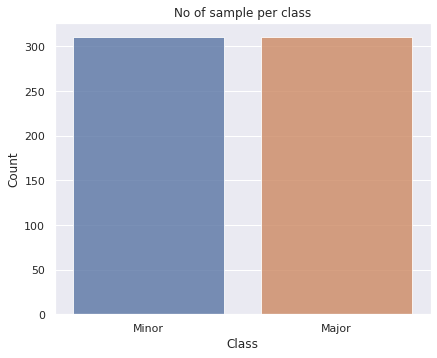

In [ ]:
Type_count  = df3['label'].value_counts()
Type_count = Type_count[:10,]

plt.figure(figsize=(6,5))
sns.barplot(Type_count.index, Type_count.values, alpha=0.8)
plt.title('No of sample per class')

positions = (0,1)
labels = ("Minor", "Major")
plt.xticks(positions, labels)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.savefig('Label frequency.png')
plt.show()



# **Create training data with different feature combinations**

In [ ]:
df_feature_all = df3.iloc[:, 1:-1] #16:29
df_feature_mel_chroma = df3.iloc[:, 3:9]
df_feature_mfcc_mean = df3.iloc[:, 15:28]
df_feature_mfcc_std = df3.iloc[:, 28:41]
df_feature_mfcc = df3.iloc[:, 15:41]
df_feature_chroma_mean = df3.iloc[:, 41:53]
df_feature_chroma_std = df3.iloc[:, 53:65]
df_feature_chroma = df3.iloc[:, 41:65]
df_feature_csrzhp = df3.iloc[:, 65:83]

df_label = df3.iloc[:, -1]

In [ ]:
df_feature_csrzhp.head()

cent_mean    cent_std       cent_var  spec_bw_mean  spec_bw_std  \
0  754.964810  609.570618  371576.338827  836.287400    471.876442    
1  467.441626  182.900637  33452.642838   462.348602    364.066028    
2  402.337425  322.928447  104282.781636  533.936608    433.849236    
3  392.625021  109.902561  12078.572809   590.734260    171.869329    
4  705.785762  552.648763  305420.655399  831.434285    486.318023    

     spec_bw_var  rolloff_mean  rolloff_std   rolloff_var  zcr_mean   zcr_std  \
0  222667.376315  1281.046143   1265.727608  1.602066e+06  0.034123  0.022053   
1  132544.072389  732.504485    512.158122   2.623059e+05  0.028105  0.003494   
2  188225.159902  702.754809    871.993734   7.603731e+05  0.015954  0.008193   
3  29539.066212   532.422739    323.093284   1.043893e+05  0.022915  0.002690   
4  236505.219877  1291.850522   1243.763231  1.546947e+06  0.038337  0.032081   

    zcr_var  harm_mean  harm_std  harm_var     perc_mean  perc_std  perc_var  
0  0.000486 -0.000008   0.084351  0.007115 -1.638793e-05  0.013018  0.000169  
1  0.000012 -0.000016   0.066289  0.004394 -4.506160e-06  0.004510  0.000020  
2  0.000067  0.000011   0.056044  0.003141 -2.458003e-07  0.003757  0.000014  
3  0.000007  0.000002   0.151676  0.023006 -1.790985e-05  0.016992  0.000289  
4  0.001029 -0.000009   0.094469  0.008924 -3.029631e-05  0.008516  0.000073

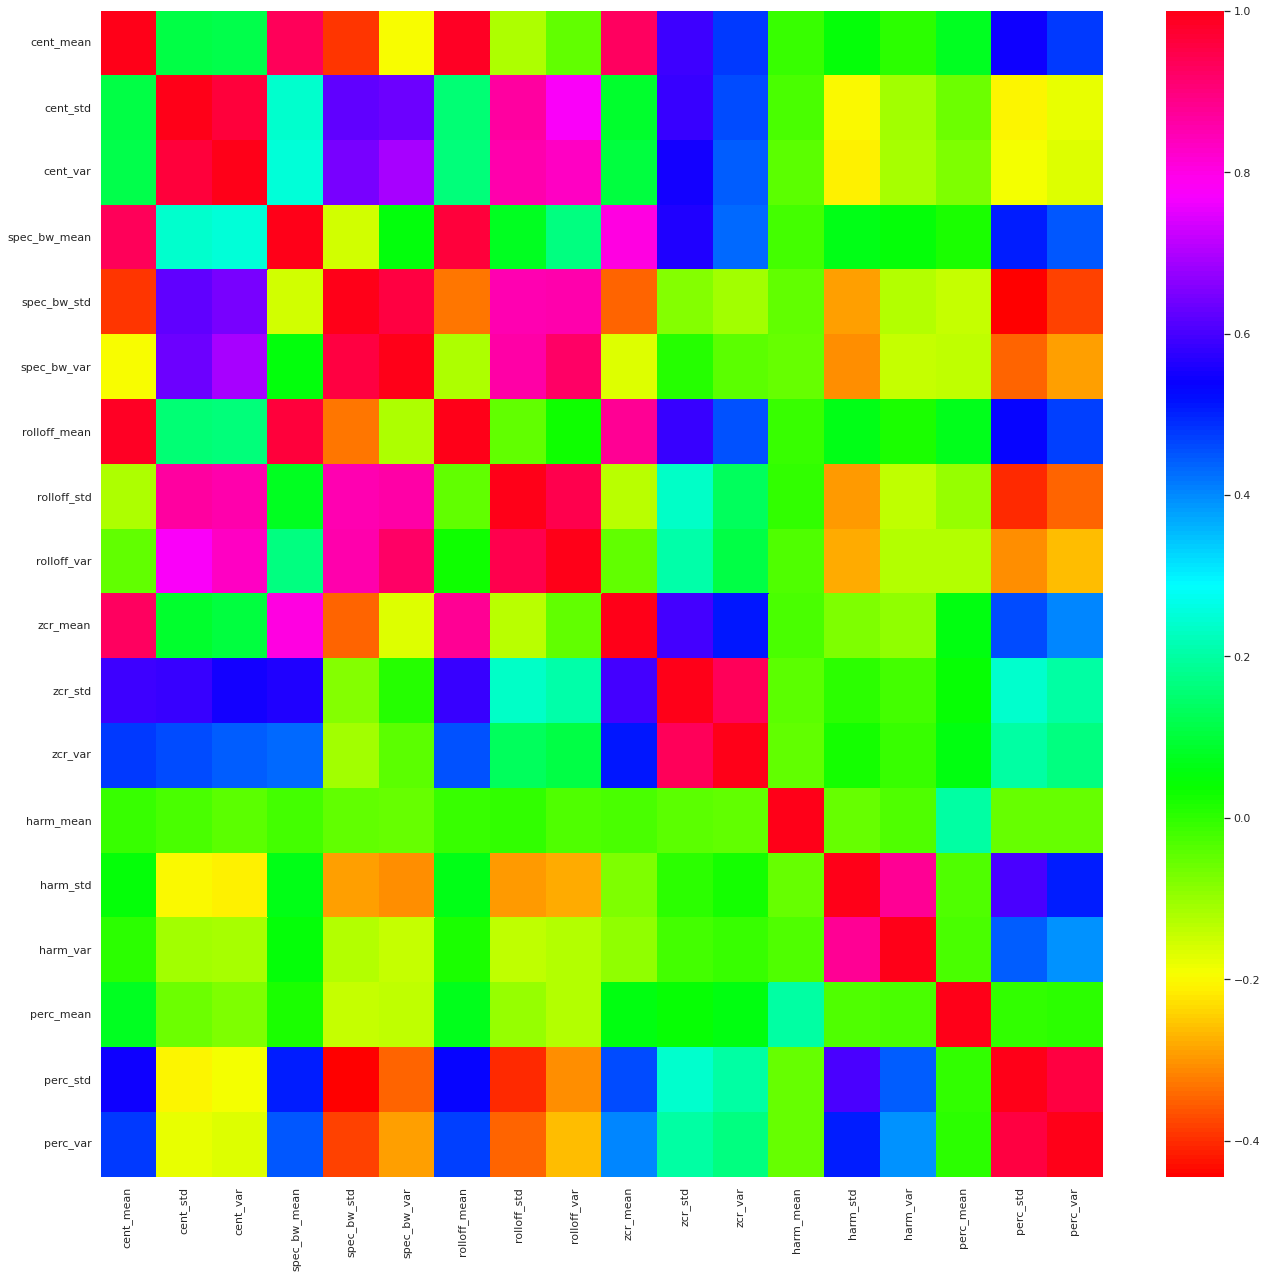

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df_feature_csrzhp.corr(),cmap='hsv')
plt.savefig('heatmap cszrhp.png')
plt.show()

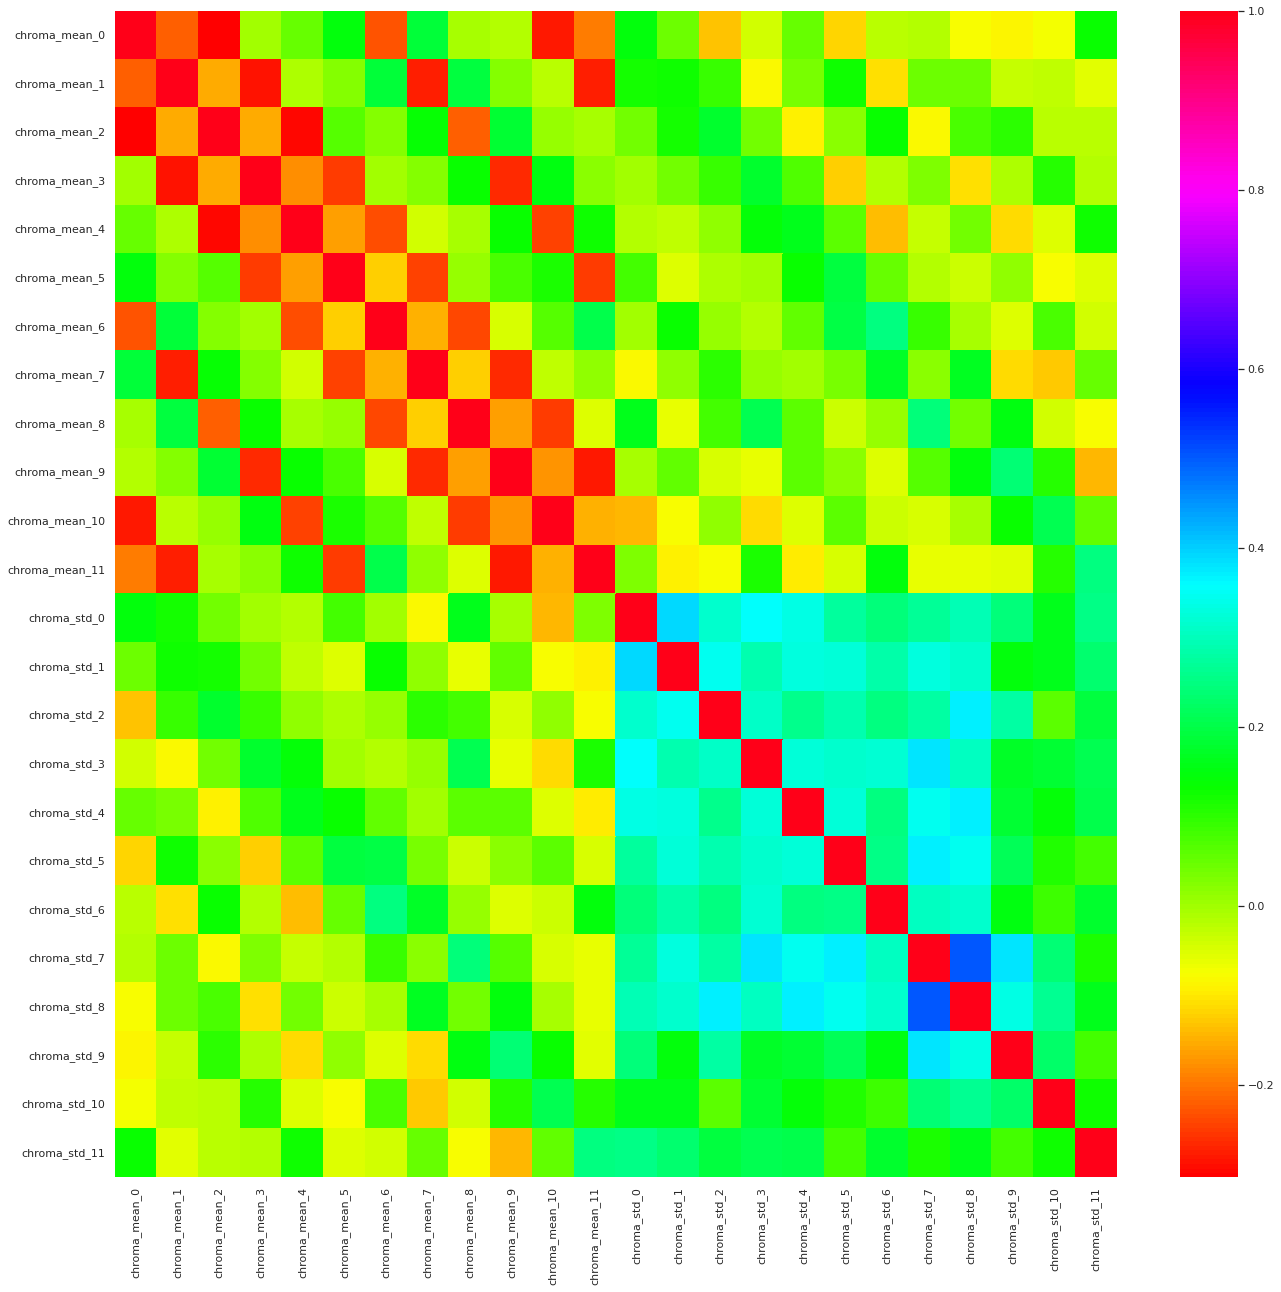

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df_feature_chroma.corr(),cmap='hsv')
plt.savefig('heatmap chroma.png')
plt.show()

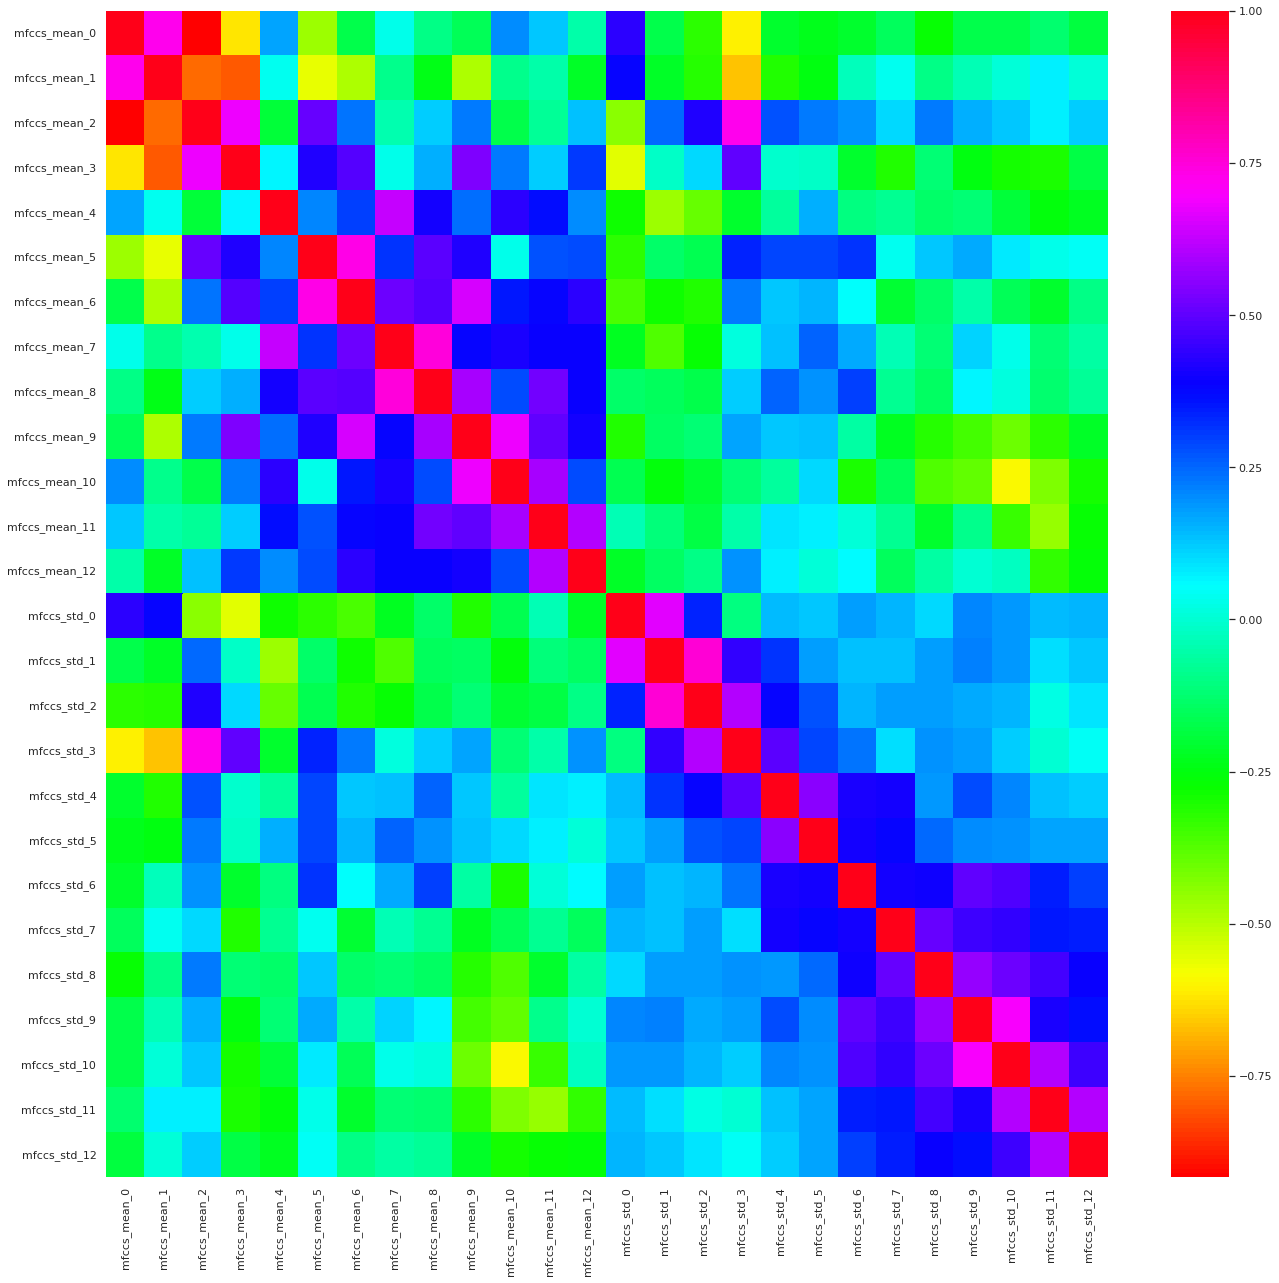

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df_feature_mfcc.corr(),cmap='hsv')
plt.savefig('heatmap mfcc.png')
plt.show()

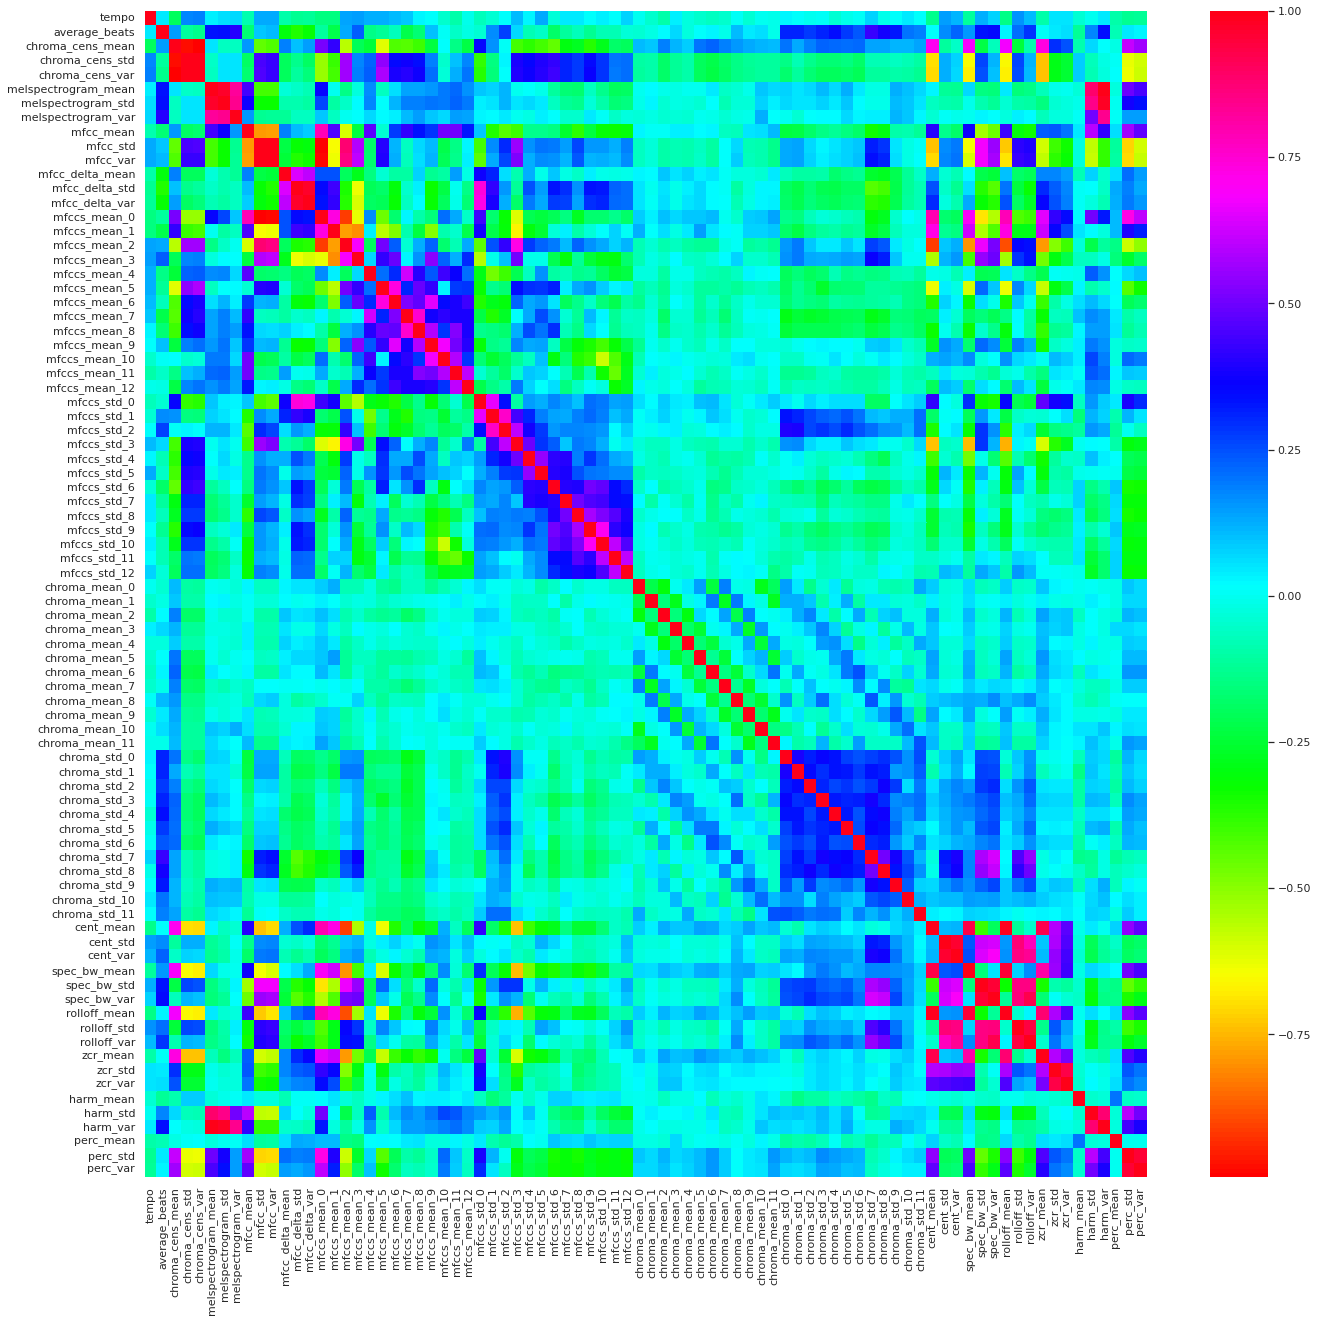

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df_feature_all.corr(),cmap='hsv')
plt.savefig('heatmap all.png')
plt.show()